In [1]:
import os
import joblib
import pandas as pd
import numpy as np
import pathlib
import sys

In [2]:
#load model
file_path = pathlib.Path('../models/prediction_model_V1.joblib')
if os.path.exists(file_path):
    prediction_model = joblib.load(file_path)

In [3]:
df= pd.read_csv('../data/processed/mbappe_shot_events.csv')
df.shape

(222, 12)

In [4]:
#predict xG
df.columns

Index(['play_pattern', '1v1_shot', 'shot_xg', 'shot_technique', 'body_part',
       'shot_type', 'shot_outcome', 'under_pressure', 'aerial_shot_won',
       'first_time_shot', 'shot_distance', 'shot_angle'],
      dtype='object')

In [5]:
#confirm no missing values
print(df.isna().mean()*100)

#confirm data types
print(f"\n Data types in dataset \n{df.dtypes}")

play_pattern       0.0
1v1_shot           0.0
shot_xg            0.0
shot_technique     0.0
body_part          0.0
shot_type          0.0
shot_outcome       0.0
under_pressure     0.0
aerial_shot_won    0.0
first_time_shot    0.0
shot_distance      0.0
shot_angle         0.0
dtype: float64

 Data types in dataset 
play_pattern        object
1v1_shot             int64
shot_xg            float64
shot_technique      object
body_part           object
shot_type           object
shot_outcome        object
under_pressure       int64
aerial_shot_won      int64
first_time_shot      int64
shot_distance      float64
shot_angle         float64
dtype: object


In [6]:
sys.path.append("C:/Users/On3B3/OneDrive/Documents/Programming_Projects/xG_Model/src")
#import user-defined Class for shot calculations
from helperFunctions import typeToCategory


#categorical features
cat_features =['shot_type','body_part','first_time_shot','1v1_shot',
               'under_pressure','aerial_shot_won',
               'play_pattern','shot_technique'
               ]

X= df.copy() 
#Change to category
X=typeToCategory(X,cat_features)


Data types for categorical features : 
shot_type          category
body_part          category
first_time_shot    category
1v1_shot           category
under_pressure     category
aerial_shot_won    category
play_pattern       category
shot_technique     category
dtype: object


In [7]:
X['shot_type'] = X['shot_type'].cat.rename_categories({'Free Kick': 'set pieces'})

In [8]:
X['shot_type'].value_counts()

shot_type
Open Play     214
Penalty         7
set pieces      1
Name: count, dtype: int64

In [9]:
#creating binary target feature
X['goal'] = X['shot_outcome'].apply(lambda x: 1 if x == "Goal" else 0)
df_x= X.drop(columns=['shot_outcome'], axis=1)

In [10]:
numeric_features= X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print numeric features to verify
print("Numeric features:", numeric_features)


# Get categorical features (non-numeric features)
categorical_features = df_x.select_dtypes(include=['category']).columns.tolist()
print("\nCategorical features:", categorical_features)

features= [f for f in df_x.columns.tolist() if f != 'goal' and f!= 'shot_xg']
print(f"\n All features for modeling:", features)

Numeric features: ['shot_xg', 'shot_distance', 'shot_angle', 'goal']

Categorical features: ['play_pattern', '1v1_shot', 'shot_technique', 'body_part', 'shot_type', 'under_pressure', 'aerial_shot_won', 'first_time_shot']

 All features for modeling: ['play_pattern', '1v1_shot', 'shot_technique', 'body_part', 'shot_type', 'under_pressure', 'aerial_shot_won', 'first_time_shot', 'shot_distance', 'shot_angle']


['play_pattern', 'shot_technique', 'body_part', 'shot_type', 'under_pressure', 'aerial_shot_won', 'first_time_shot', '1v1_shot', 'shot_distance', 'shot_angle']

In [11]:
predicted_xG=prediction_model.predict_proba(df_x)[:,1].round(2)


In [12]:
print(len(predicted_xG))

222


In [15]:
mbappe_actual_goals=df_x['goal'].sum()
mbappe_sum_xG= predicted_xG.sum()
mbappe_actual_xg = X['shot_xg'].sum()
print(f"\nMbappe's actual goals: {mbappe_actual_goals}")
print(f"\nMbappe's total xG: {mbappe_sum_xG}")
print(f"\nMbappe's actual xG: {mbappe_actual_xg:.2f}")


Mbappe's actual goals: 49

Mbappe's total xG: 29.48

Mbappe's actual xG: 38.52


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='shot_xg'>

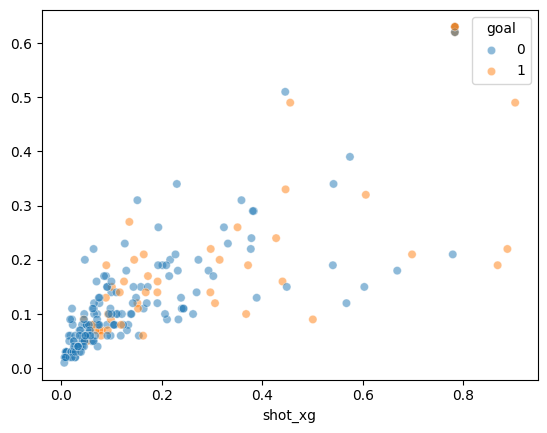

In [18]:
sns.scatterplot(x=X['shot_xg'], y=predicted_xG, hue=X['goal'], alpha=0.5)